In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import numpy.random as rd
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("ggplot")

%matplotlib inline

In [2]:
import os
os.chdir("../..")
home_dir = os.getcwd()
os.chdir("src")

from baumwelch import BaumWelch
from sdhm import SDHM
os.chdir(home_dir)

# Access Tracer

1. 隠れマルコフモデルの混合分布による行動モデリング
2. 複数の混合隠れマルコフモデルのオンライン忘却型学習
3. 動的モデル選択による最適混合数の決定
4. スコアリング

## データ生成

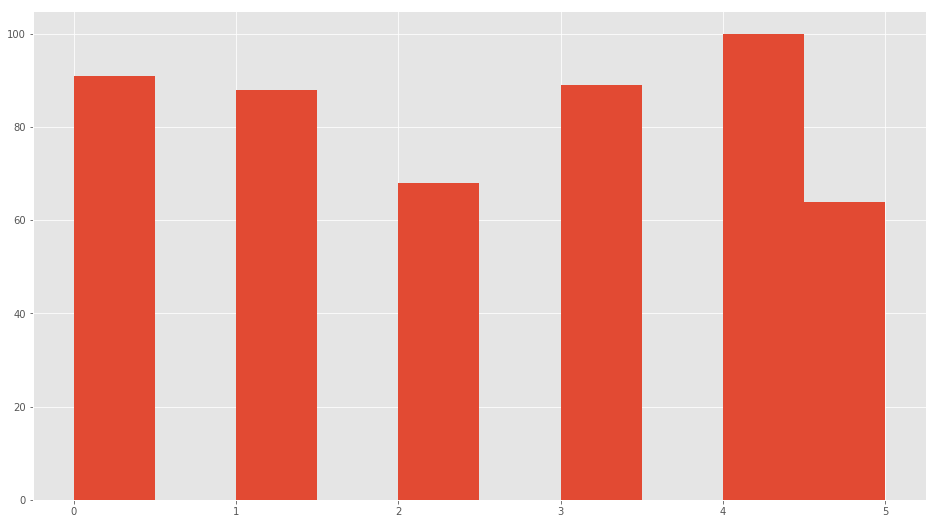

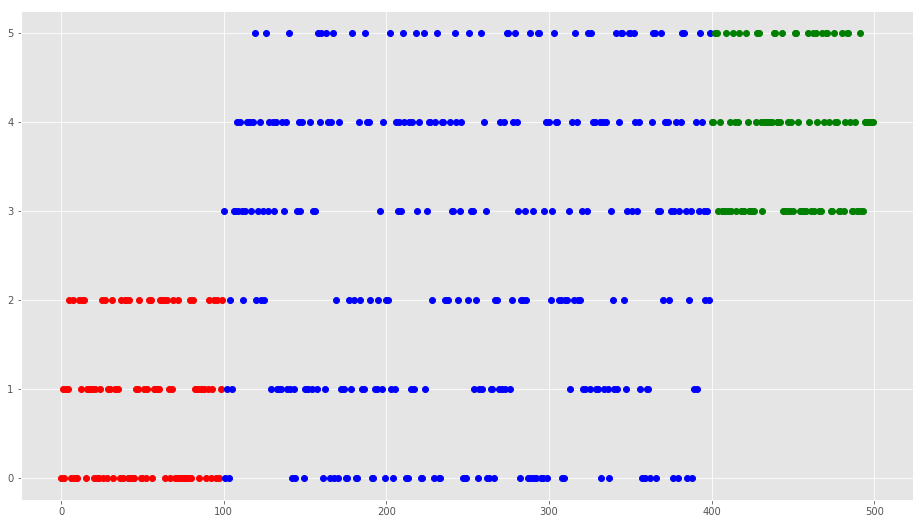

In [3]:
rd.seed(0)

dice1 = [1, 2, 3, 4, 5 ,0]
dice2 = [0, 1, 2]
dice3 = [3, 4, 5]

y1 = rd.choice(dice2, 100)
flag1 = np.array([2 for i in range(100)])
y2 = rd.choice(dice1, 300)
flag2 = np.array([1 for i in range(300)])
y3 = rd.choice(dice3, 100)
flag3 = np.array([3 for i in range(100)])

y = np.concatenate([y1, y2, y3])
flag = np.concatenate([flag1, flag2, flag3])
data = np.concatenate([y[:, np.newaxis], flag[:, np.newaxis]], axis=1)
org_data = pd.DataFrame(data)

plt.figure(figsize=(16, 9))
plt.hist(org_data[0])
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(org_data.loc[org_data[1]==2][0], "o", c="r")
plt.plot(org_data.loc[org_data[1]==1][0], "o", c="b")
plt.plot(org_data.loc[org_data[1]==3][0], "o", c="g")
plt.show()

In [4]:
window_size = 5
y = np.array([np.array(org_data[0][i:i+window_size]) for i in range(org_data.shape[0]-window_size+1)])

In [5]:
Y = [0, 1]
y = np.array([np.random.choice(Y, 3) for i in range(500)])
#y = np.array([0, 1, 0])[:, np.newaxis]
y

array([[0, 0, 0],
       [0, 1, 1],
       [1, 1, 0],
       ..., 
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 1]])

## SDHM

## 入力パラメータ設定

In [6]:
# Given
r = 0.1 # 忘却パラメータ 0<r<1
nu = 0.9 # 推定係数
K = 2 # 混合数
n = 1 # HMMの次数
M = y.shape[0] # データ数
Tj = y.shape[1] # セッションの長さ
N1 = 3 # 状態変数の数
N2 = 2 # 出力シンボルの数

In [7]:
np.random.seed(0)
sdhm = SDHM(r, nu, K, Tj, N1, N2)

In [8]:
while True:
    if sdhm.j == M-1:
        break
    sdhm.update(y[sdhm.j])

In [9]:
sdhm.pi

array([[ 0.5       ,  0.5       ],
       [ 0.4682158 ,  0.6227842 ],
       [ 0.59150674,  0.58661455],
       [ 0.66938258,  0.55394877],
       [ 0.63488877,  0.6335614 ],
       [ 0.71659486,  0.57734801],
       [ 0.75710788,  0.54808911],
       [ 0.78080584,  0.53270852],
       [ 0.82157734,  0.48715374],
       [ 0.77009482,  0.5855936 ],
       [ 0.72049592,  0.65680316],
       [ 0.68873899,  0.69490912],
       [ 0.70430715,  0.68163833],
       [ 0.73295953,  0.6537478 ],
       [ 0.70922686,  0.68154703],
       [ 0.6815495 ,  0.71109319],
       [ 0.66827853,  0.72416517],
       [ 0.69247222,  0.70206625],
       [ 0.70882303,  0.68598723],
       [ 0.75122617,  0.64213724],
       [ 0.75350391,  0.6388528 ],
       [ 0.76007744,  0.63059161],
       [ 0.75828079,  0.63231579],
       [ 0.71244865,  0.6869246 ],
       [ 0.70580627,  0.69287094],
       [ 0.71764453,  0.68004787],
       [ 0.72940593,  0.66696237],
       [ 0.71857719,  0.67819992],
       [ 0.67457807,

In [14]:
sdhm.pi

array([[ 0.5       ,  0.5       ],
       [ 0.4682158 ,  0.6227842 ],
       [ 0.59150674,  0.58661455],
       [ 0.66938258,  0.55394877],
       [ 0.63488877,  0.6335614 ],
       [ 0.71659486,  0.57734801],
       [ 0.75710788,  0.54808911],
       [ 0.78080584,  0.53270852],
       [ 0.82157734,  0.48715374],
       [ 0.77009482,  0.5855936 ],
       [ 0.72049592,  0.65680316],
       [ 0.68873899,  0.69490912],
       [ 0.70430715,  0.68163833],
       [ 0.73295953,  0.6537478 ],
       [ 0.70922686,  0.68154703],
       [ 0.6815495 ,  0.71109319],
       [ 0.66827853,  0.72416517],
       [ 0.69247222,  0.70206625],
       [ 0.70882303,  0.68598723],
       [ 0.75122617,  0.64213724],
       [ 0.75350391,  0.6388528 ],
       [ 0.76007744,  0.63059161],
       [ 0.75828079,  0.63231579],
       [ 0.71244865,  0.6869246 ],
       [ 0.70580627,  0.69287094],
       [ 0.71764453,  0.68004787],
       [ 0.72940593,  0.66696237],
       [ 0.71857719,  0.67819992],
       [ 0.67457807,

In [10]:
sdhm.gamma_

array([[[ 0.33750765,  0.26241723,  0.40007512],
        [ 0.4612004 ,  0.24318019,  0.29561941]],

       [[ 0.30756974,  0.23999678,  0.37064928],
        [ 0.45935485,  0.29839026,  0.31503909]],

       [[ 0.34998303,  0.29919663,  0.34732709],
        [ 0.42301485,  0.27878485,  0.28981485]],

       ..., 
       [[ 0.22569972,  0.2694012 ,  0.20536661],
        [ 0.19723589,  0.2006224 ,  0.29649481]],

       [[ 0.22135309,  0.27157765,  0.20678139],
        [ 0.20131839,  0.20389237,  0.28990236]],

       [[ 0.22770689,  0.26773131,  0.20314052],
        [ 0.19980823,  0.19583844,  0.30060561]]])

In [10]:
def generate_init_matrix(R, C):
    '''
    R: 行数
    C: 列数
    適当な初期値をもつR✕C行列を生成する関数
    '''
    #空の行列を作成
    M = np.zeros((R, C))
    #適当な値を行ごとに代入していく(各行の合計が1になれば良い)
    for i in range(R):
        rand = np.random.rand(C) #0~1の一様乱数生成
        rand = rand / np.sum(rand) #合計が1になるようにする
        M[i] = rand
    
    return M

In [11]:
A = generate_init_matrix(N1, N1)
print(A)

[[ 0.28171115  0.28393791  0.43435094]
 [ 0.4612004   0.24318019  0.29561941]
 [ 0.48969517  0.04227466  0.46803016]]


In [12]:
B = generate_init_matrix(N1, N2)
print(B)

[[ 0.76120581  0.23879419]
 [ 0.29014279  0.70985721]
 [ 0.38945051  0.61054949]]


In [13]:
G = generate_init_matrix(1, N1)[0]
print(G)

[ 0.28685136  0.64640994  0.0667387 ]


https://qiita.com/ta-ka/items/3e5306d0432c05909992

結果の部分参照

行列Aは横方向で見れば、足すと１で確率値となっているが、
縦方向で見ると、足しても１になっていない

In [15]:
sdhm.gamma_

array([[[ 0.33750765,  0.26241723,  0.40007512],
        [ 0.4612004 ,  0.24318019,  0.29561941]],

       [[ 0.30756974,  0.23999678,  0.37064928],
        [ 0.45935485,  0.29839026,  0.31503909]],

       [[ 0.34998303,  0.29919663,  0.34732709],
        [ 0.42301485,  0.27878485,  0.28981485]],

       ..., 
       [[ 0.22569972,  0.2694012 ,  0.20536661],
        [ 0.19723589,  0.2006224 ,  0.29649481]],

       [[ 0.22135309,  0.27157765,  0.20678139],
        [ 0.20131839,  0.20389237,  0.28990236]],

       [[ 0.22770689,  0.26773131,  0.20314052],
        [ 0.19980823,  0.19583844,  0.30060561]]])

### τについて

In [14]:
k = 0

In [15]:
sdhm.tau[0, k, 0, :, :]

array([[ 0.03239899,  0.04764194,  0.12927507],
       [ 0.04204803,  0.06264539,  0.10508451],
       [ 0.24181156,  0.28430513,  0.05478937]])

In [16]:
sdhm.tau[0, k, 0, 0, :]

array([ 0.03239899,  0.04764194,  0.12927507])

In [17]:
a = 0
c = []
for i in range(1):
    b = np.sum(sdhm.tau[0, k, 0, i, :])
    for j in range(3):
        a += np.sum(sdhm.tau[0, k, 0, i, j])
        c.append(np.sum(sdhm.tau[0, k, 0, i, :]))
print(a)
print(b)
print(c)

0.209316000806
0.209316000806
[0.20931600080552976, 0.20931600080552976, 0.20931600080552976]


## 計算結果としては同じだが, 現在のコードでは, cのような計算を行っていることになる